 **Block 2. Data analysis**

In [1]:
import pandas as pd 
import folium
from folium.plugins import HeatMap
import numpy as np 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist 
import matplotlib.pyplot as plt 
import matplotlib.cm as cm
import matplotlib.colors as colors
import seaborn as sns
from scipy import stats

In [2]:
Moscow_Borough_df = pd.read_csv("Moscow_Borough_df.csv")
Moscow_venues_df = pd.read_csv("Moscow_venues_df.csv")
mo_geojson = 'mo.geojson'

Working with potential features

In [4]:
Moscow_Borough_Feature_list = ['Borough_Name', 'District_Name', 'Borough_Area', 'Borough_Population_Density', 'Borough_Housing_Area', 'Borough_Population', 'Borough_Housing_Price']
Moscow_Borough_Feature_df = Moscow_Borough_df[Moscow_Borough_Feature_list]
Moscow_Borough_Feature_df.columns = ['Borough', 'District', 'Area', 'Population_Density', 'Housing_Area', 'Population', 'Housing_Price']
Moscow_Borough_Feature_df.head(5)

Borough District  Area  Population_Density  Housing_Area  Population  \
0  Академический     ЮЗАО  5.83               18874        2467.0      110038   
1   Алексеевский     СВАО  5.29               15242        1607.9       80634   
2   Алтуфьевский     СВАО  3.25               17752         839.3       57697   
3          Арбат      ЦАО  2.11               17207         731.0       36308   
4       Аэропорт      САО  4.58               17367        1939.7       79541   

   Housing_Price  
0       199999.0  
1       199474.0  
2       138021.0  
3       438568.0  
4       234544.0

In [5]:
Moscow_Borough_Feature_df.describe()

Area  Population_Density  Housing_Area     Population  \
count  120.000000          120.000000    120.000000     120.000000   
mean     8.706417        13477.566667   1775.684167  100188.700000   
std      4.927028         5965.300074    815.978445   44012.960386   
min      2.110000          563.000000     69.900000   12264.000000   
25%      5.395000         9770.750000   1244.450000   72498.500000   
50%      7.680000        13543.500000   1709.450000   94166.000000   
75%     10.282500        17217.500000   2206.600000  127001.000000   
max     27.570000        30479.000000   4523.000000  254142.000000   

       Housing_Price  
count     120.000000  
mean   190037.316667  
std     66182.885601  
min    109421.000000  
25%    147339.000000  
50%    168172.500000  
75%    210978.000000  
max    438568.000000

Moscow Boroughs has non-uniform population from 12 264 people to 254 142 people.  
The average housing price varies from 109 421 rub/m²  to 438 568 rub/m².

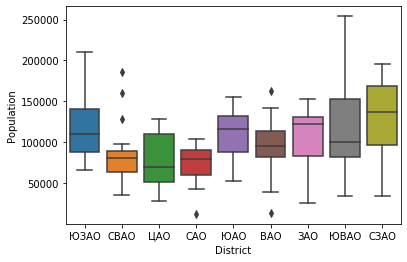

In [6]:
sns.boxplot(x="District", y="Population", data=Moscow_Borough_Feature_df)

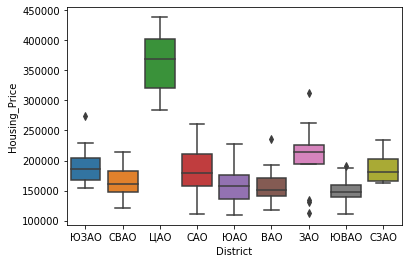

In [7]:
sns.boxplot(x="District", y="Housing_Price", data=Moscow_Borough_Feature_df)

Boxplot above shows us that feature District can be a good predictor for Housing price

Correlation matrix:

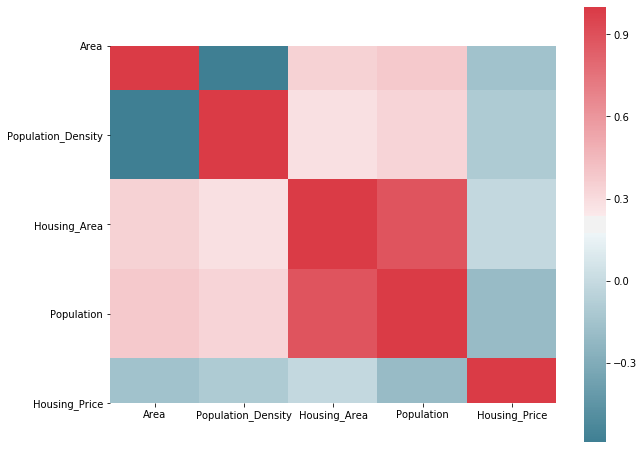

In [8]:
Moscow_Borough_Feature_corr = Moscow_Borough_Feature_df.corr()
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(Moscow_Borough_Feature_corr, mask=np.zeros_like(Moscow_Borough_Feature_corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [9]:
Moscow_Borough_Feature_corr.head(5)

Area  Population_Density  Housing_Area  Population  \
Area                1.000000           -0.588640      0.344188    0.380155   
Population_Density -0.588640            1.000000      0.283606    0.335691   
Housing_Area        0.344188            0.283606      1.000000    0.885345   
Population          0.380155            0.335691      0.885345    1.000000   
Housing_Price      -0.154996           -0.104140     -0.016971   -0.198325   

                    Housing_Price  
Area                    -0.154996  
Population_Density      -0.104140  
Housing_Area            -0.016971  
Population              -0.198325  
Housing_Price            1.000000

Calculating the correlations between main parameters:

In [10]:
pearson_coef, p_value = stats.pearsonr(Moscow_Borough_Feature_df['Area'], Moscow_Borough_Feature_df['Population'])
print("The Pearson Correlation Coefficient 'Area' to 'Population' is", pearson_coef, " with a P-value of P =", p_value)  

pearson_coef, p_value = stats.pearsonr(Moscow_Borough_Feature_df['Area'], Moscow_Borough_Feature_df['Population_Density'])
print("The Pearson Correlation Coefficient 'Area' to 'Population_Density' is", pearson_coef, " with a P-value of P =", p_value)

pearson_coef, p_value = stats.pearsonr(Moscow_Borough_Feature_df['Area'], Moscow_Borough_Feature_df['Housing_Price'])
print("The Pearson Correlation Coefficient 'Area' to 'Housing_Price' is", pearson_coef, " with a P-value of P =", p_value) 

pearson_coef, p_value = stats.pearsonr(Moscow_Borough_Feature_df['Housing_Area'], Moscow_Borough_Feature_df['Area'])
print("The Pearson Correlation Coefficient 'Housing_Area' to 'Area' is", pearson_coef, " with a P-value of P =", p_value)

pearson_coef, p_value = stats.pearsonr(Moscow_Borough_Feature_df['Housing_Area'], Moscow_Borough_Feature_df['Population_Density'])
print("The Pearson Correlation Coefficient 'Housing_Area' to 'Population_Density' is", pearson_coef, " with a P-value of P =", p_value) 

pearson_coef, p_value = stats.pearsonr(Moscow_Borough_Feature_df['Population_Density'], Moscow_Borough_Feature_df['Population'])
print("The Pearson Correlation Coefficient 'Population_Density' to 'Population' is", pearson_coef, " with a P-value of P =", p_value)  

pearson_coef, p_value = stats.pearsonr(Moscow_Borough_Feature_df['Population_Density'], Moscow_Borough_Feature_df['Housing_Price'])
print("The Pearson Correlation Coefficient 'Population_Density' to 'Housing_Price' is", pearson_coef, " with a P-value of P =", p_value)

pearson_coef, p_value = stats.pearsonr(Moscow_Borough_Feature_df['Housing_Area'], Moscow_Borough_Feature_df['Population'])
print("The Pearson Correlation Coefficient 'Housing_Area' to 'Population' is", pearson_coef, " with a P-value of P =", p_value)

pearson_coef, p_value = stats.pearsonr(Moscow_Borough_Feature_df['Housing_Area'], Moscow_Borough_Feature_df['Housing_Price'])
print("The Pearson Correlation Coefficient 'Housing_Area' to 'Housing_Price' is", pearson_coef, " with a P-value of P =", p_value)

pearson_coef, p_value = stats.pearsonr(Moscow_Borough_Feature_df['Population'], Moscow_Borough_Feature_df['Housing_Price'])
print("The Pearson Correlation Coefficient 'Population' to 'Housing_Price' is", pearson_coef, " with a P-value of P =", p_value)


The Pearson Correlation Coefficient 'Area' to 'Population' is 0.3801548969695431  with a P-value of P = 1.846169214258945e-05
The Pearson Correlation Coefficient 'Area' to 'Population_Density' is -0.5886402260872453  with a P-value of P = 1.5425652689398923e-12
The Pearson Correlation Coefficient 'Area' to 'Housing_Price' is -0.15499599520906004  with a P-value of P = 0.09095993625676131
The Pearson Correlation Coefficient 'Housing_Area' to 'Area' is 0.3441883147278516  with a P-value of P = 0.00011849306555458508
The Pearson Correlation Coefficient 'Housing_Area' to 'Population_Density' is 0.2836057432971165  with a P-value of P = 0.0016956094309013407
The Pearson Correlation Coefficient 'Population_Density' to 'Population' is 0.33569063819980893  with a P-value of P = 0.00017811926001207908
The Pearson Correlation Coefficient 'Population_Density' to 'Housing_Price' is -0.10414012398413303  with a P-value of P = 0.25766045291148676
The Pearson Correlation Coefficient 'Housing_Area' to

Correlation between 'Area' to 'Population_Density' is significant and the linear relationship is strong. The same we can say about 'Housing_Area' and 'Population'.

Clustering with K-Means to define Boroughs that have highest mean population and smallest mean housing price:

In [11]:
def KMeans_func(X, max_clusters=10):
   
    distortions = [] 
    inertias = [] 
    mapping1 = {} 
    mapping2 = {} 
    K = range(1,max_clusters) 
    
     
    for k in K: 
        kmeans = KMeans(init = "k-means++", n_clusters=k, random_state=0, n_init = 12)
        kmeans.fit(X) 
          
        distortions.append(sum(np.min(cdist(X, kmeans.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0]) 
        inertias.append(kmeans.inertia_) 
      
        mapping1[k] = sum(np.min(cdist(X, kmeans.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0] 
        mapping2[k] = kmeans.inertia_ 
    

    for key,val in mapping1.items(): 
        print(str(key)+' : '+str(val))
    
    plt.plot(K, distortions, 'bx-') 
    plt.xlabel('Values of K') 
    plt.ylabel('Distortion') 
    plt.title('The Elbow Method') 
    plt.show() 
    
    
    for key,val in mapping2.items(): 
        print(str(key)+' : '+str(val)) 
        
    plt.plot(K, inertias, 'bx-') 
    plt.xlabel('Values of K') 
    plt.ylabel('Inertia') 
    plt.title('The Elbow Method') 
    plt.show() 

1 : 1.1681778581537783
2 : 0.9770201958418249
3 : 0.7529085887335124
4 : 0.6620670056933088
5 : 0.5702222089259454
6 : 0.5299961483123298
7 : 0.4795814406524927
8 : 0.439443181825141
9 : 0.40620023891312673


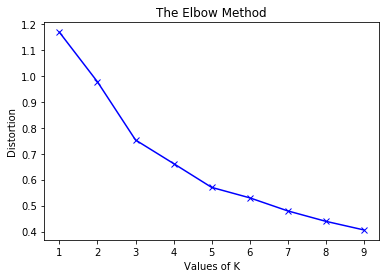

1 : 239.99999999999994
2 : 154.80323686050957
3 : 87.4436438745167
4 : 68.18275778241953
5 : 51.13347764410793
6 : 42.66877939232866
7 : 34.26742299059306
8 : 29.850056209774856
9 : 25.580269779284382


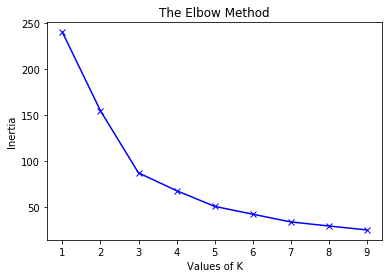

In [12]:
X2 = Moscow_Borough_df[['Borough_Population','Borough_Housing_Price']]

X2 = StandardScaler().fit_transform(X2)

KMeans_func(X2, 10)

In [14]:
kclusters = 3

kmeans = KMeans(init = "k-means++", n_clusters=kclusters, random_state=0, n_init = 12)
kmeans.fit(X2)

Moscow_Borough_df['Cluster_Labels'] = kmeans.labels_.astype(int)

groups = Moscow_Borough_df.groupby('Cluster_Labels')
Moscow_population = Moscow_Borough_df['Borough_Population'].sum()
Moscow_area = Moscow_Borough_df['Borough_Area'].sum()
Moscow_Clustering_df = groups.mean().reset_index()[['Cluster_Labels', 'Borough_Population', 'Borough_Housing_Price']]
Moscow_Clustering_df.columns = ['Cluster_Labels', 'Population_Mean', 'Housing_Price_Mean']
Moscow_Clustering_df['Population_Sum'] = groups.sum().reset_index()[['Borough_Population']]
Moscow_Clustering_df['Population_%'] = Moscow_Clustering_df['Population_Sum'] / Moscow_population * 100
Moscow_Clustering_df['Borough_Count'] = groups.count().reset_index()[['Borough_Name']]
Moscow_Clustering_df['Area_Sum'] = groups.sum().reset_index()[['Borough_Area']]
Moscow_Clustering_df['Area_%'] = Moscow_Clustering_df['Area_Sum'] / Moscow_area * 100
Moscow_Clustering_df['Population_Density'] = Moscow_Clustering_df['Population_Sum'] / Moscow_Clustering_df['Area_Sum']


Moscow_Clustering_df.to_csv("Moscow_Clustering_df.csv", index = False)
Moscow_Borough_df.to_csv("Moscow_Borough_df.csv", index = False)

Moscow_Clustering_df.head()

Cluster_Labels  Population_Mean  Housing_Price_Mean  Population_Sum  \
0               0     78939.661972       173695.070423         5604716   
1               1    153465.529412       160741.323529         5217828   
2               2     80006.666667       333794.866667         1200100   

   Population_%  Borough_Count  Area_Sum     Area_%  Population_Density  
0     46.617999             71    539.87  51.673574        10381.602978  
1     43.400004             34    391.25  37.448434        13336.301597  
2      9.981997             15    113.65  10.877992        10559.612846

We get 3 clusters:
* Cluster 0 with the lowest mean population and population density among other clusters;
* Cluster 1 with the highest mean population and population density, the smallest mean housing price;
* Cluster 2 with the highest mean housing price.
   
Cluster 1 is perfect for solving the task that I set myself in this project.

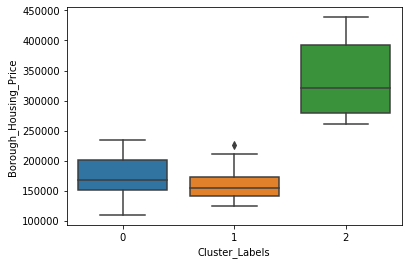

In [15]:
sns.boxplot(x="Cluster_Labels", y="Borough_Housing_Price", data=Moscow_Borough_df)

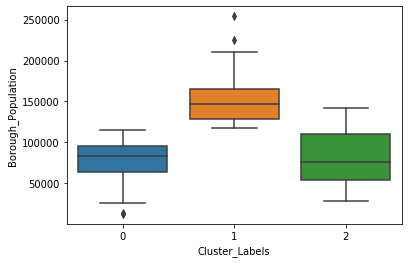

In [16]:
sns.boxplot(x="Cluster_Labels", y="Borough_Population", data=Moscow_Borough_df)

Clusters visualizing:

In [17]:
Moscow_Borough_df = pd.read_csv("Moscow_Borough_df.csv")
mo_geojson = 'mo.geojson'

Moscow_lat= 55.7504461
Moscow_lng= 37.6174943

Moscow_map = folium.Map(location=[Moscow_lat, Moscow_lng], zoom_start=10)

Moscow_map.choropleth(
    geo_data=mo_geojson,
    data=Moscow_Borough_df,
    name='Population Density',
    columns=['Borough_Name', 'Cluster_Labels'],
    key_on='feature.properties.NAME',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Borough Pub Clustering in Moscow City')


for Borough_Name, lat, lng, Borough_Population in zip(Moscow_Borough_df['Borough_Name'], Moscow_Borough_df['Latitude'], Moscow_Borough_df['Longitude'], Moscow_Borough_df['Borough_Population']):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5, 
        color='yellow',
        fill=True,
        #popup='{}, Москва, Россия ({:})'.format(Borough_Name, Borough_Population),
        popup=folium.Popup('{}, Москва, Россия ({:})'.format(Borough_Name, Borough_Population), parse_html=True),
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(Moscow_map)

Moscow_map

Dataset of the best areas to open a pub:

In [20]:
Moscow_Recomended_Borough_df = Moscow_Borough_df[Moscow_Borough_df['Cluster_Labels'].isin(['1'])]

Moscow_Recomended_Borough_df.drop(['Latitude','Longitude','Cluster_Labels', 'OKTMO_Code', 'OKATO_Code', 'Borough_Housing_Area_Per_Person'], axis=1, inplace=True)

Moscow_Recomended_Borough_df.reset_index(drop=True, inplace=True)

Moscow_Recomended_Borough_df.to_csv("Moscow_Recomended_Borough_df.csv", index = False)

Moscow_Recomended_Borough_df.head(34)

Borough_Name District_Name         Borough_Type  \
0                    Бибирево          СВАО  Муниципальный округ   
1          Бирюлёво Восточное           ЮАО  Муниципальный округ   
2                     Вешняки           ВАО  Муниципальный округ   
3             Выхино-Жулебино          ЮВАО  Муниципальный округ   
4                   Гольяново           ВАО  Муниципальный округ   
5                      Зюзино          ЮЗАО  Муниципальный округ   
6                   Зябликово           ЮАО  Муниципальный округ   
7                  Ивановское           ВАО  Муниципальный округ   
8                    Коньково          ЮЗАО  Муниципальный округ   
9                   Кузьминки          ЮВАО  Муниципальный округ   
10                    Кунцево           ЗАО  Муниципальный округ   
11                    Люблино          ЮВАО  Муниципальный округ   
12                    Марьино          ЮВАО  Муниципальный округ   
13                     Митино          СЗАО  Муниципальный округ   
14                  Можайский           ЗАО  Муниципальный округ   
15          Нагатинский Затон           ЮАО  Муниципальный округ   
16           Ново-Переделкино           ЗАО  Муниципальный округ   
17  Орехово-Борисово Северное           ЮАО  Муниципальный округ   
18     Орехово-Борисово Южное           ЮАО  Муниципальный округ   
19                   Отрадное          СВАО  Муниципальный округ   
20        Очаково-Матвеевское           ЗАО  Муниципальный округ   
21                     Перово           ВАО  Муниципальный округ   
22        Северное Медведково          СВАО  Муниципальный округ   
23            Северное Тушино          СЗАО  Муниципальный округ   
24                   Солнцево           ЗАО  Муниципальный округ   
25                   Строгино          СЗАО  Муниципальный округ   
26                Тёплый Стан          ЮЗАО  Муниципальный округ   
27         Тропарёво-Никулино           ЗАО  Муниципальный округ   
28          Хорошёво-Мнёвники          СЗАО  Муниципальный округ   
29                   Царицыно           ЮАО  Муниципальный округ   
30      Чертаново Центральное           ЮАО  Муниципальный округ   
31            Чертаново Южное           ЮАО  Муниципальный округ   
32               Южное Бутово          ЮЗАО  Муниципальный округ   
33                    Ясенево          ЮЗАО  Муниципальный округ   

    Borough_Area  Borough_Population  Borough_Population_Density  \
0           6.45              160447                       24875   
1          14.77              155937                       10557   
2          10.72              122419                       11419   
3          14.97              225493                       15062   
4          14.99              163197                       10887   
5           5.45              127301                       23357   
6           4.38              133501                       30479   
7          10.19              128514                       12611   
8           7.18              156473                       21792   
9           8.15              146208                       17939   
10         16.56              152467                        9206   
11         17.41              172523                        9909   
12         11.91              254142                       21338   
13         12.67              195476                       15428   
14         10.73              139081                       12961   
15          9.80              121143                       12361   
16          8.48              121718                       14353   
17          7.67              132307                       17249   
18          6.94              147835                       21301   
19         10.18              185745                       18246   
20         17.54              130975                        7467   
21          9.73              141269                       14518   
22          5.66              127986                       22612   
23  

Dataset of the competitors

In [21]:
Moscow_venues_df = pd.read_csv("Moscow_venues_df.csv")

Moscow_Recomended_Borough_list = Moscow_Borough_df[Moscow_Borough_df['Cluster_Labels'].isin(['1'])]['Borough_Name']

pub_categories = ['Beer Garden', 'Beer Store', 'Beer Bar', 'Irish Pub', 'Pub', 'Gastropub', 'Bar']

Moscow_pub_venues_df = Moscow_venues_df[Moscow_venues_df['Venue_Category_Name'].isin(pub_categories)]
print('There are {} venues of "Pub" subcategories of all {} venues in Moscow City'.format(Moscow_pub_venues_df.shape[0], Moscow_venues_df.shape[0]))

Moscow_pub_venues_df = Moscow_pub_venues_df[Moscow_pub_venues_df['Borough_Name'].isin(Moscow_Recomended_Borough_list)]
print('There are {} venues of all "Pub" subcategories in 1 Cluster'.format(Moscow_pub_venues_df.shape[0]))

There are 224 venues of "Pub" subcategories of all 10694 venues in Moscow City
There are 77 venues of all "Pub" subcategories in 1 Cluster


In [22]:
Moscow_pub_venues_df = Moscow_pub_venues_df[['Borough_Name','Venue_Name','Venue_Category_Name','Venue_Location','Venue_Latitude','Venue_Longitude']]
Moscow_pub_venues_df.reset_index(drop=True, inplace=True)
Moscow_pub_venues_df.to_csv("Moscow_pub_venues_df.csv", index = False)
Moscow_pub_venues_df.head(10)

Borough_Name               Venue_Name Venue_Category_Name  \
0                Солнцево         Пивная лавка № 1          Beer Store   
1                Коньково                    'Гол'                 Bar   
2                Коньково  Интербир - Пивной Бутик          Beer Store   
3   Чертаново Центральное             Kon-Tiki Bar                 Bar   
4      Бирюлёво Восточное                      Ёрш            Beer Bar   
5                Солнцево               Bayern Pub                 Pub   
6                Коньково         Drunken Duck Pub           Irish Pub   
7                Коньково                     Е 13                 Bar   
8  Орехово-Борисово Южное       Easy Pub (Изи Паб)           Irish Pub   
9      Тропарёво-Никулино                Ян Примус                 Pub   

                               Venue_Location  Venue_Latitude  Venue_Longitude  
0           Боровское ш., 2а, корп. 3, 119618       55.660778        37.411151  
1                  Улица Академика Арцимовича       55.639119        37.511738  
2  Профсоюзная улица дом 116 корпус 1, 117437       55.638647        37.522200  
3                ул. Рождественка д. 5/7 Стр2       55.623146        37.591894  
4                         Липецкая улица, 2к8       55.608307        37.664941  
5           Боровское ш., 2а, корп. 3, 119618       55.661527        37.411430  
6                        Профсоюзная ул., 104       55.641895        37.524950  
7                        Введенского Ул, 13 Е       55.641988        37.540933  
8                            Каширское ш.,122       55.606163        37.718268  
9           просп. Вернадского, 121/1, 119571       55.657250        37.481129

In [25]:
mo_geojson = 'mo.geojson'

Moscow_lat= 55.7504461
Moscow_lng= 37.6174943

Moscow_map = folium.Map(location=[Moscow_lat, Moscow_lng], zoom_start=10)

Moscow_map.choropleth(
    geo_data=mo_geojson,
    data=Moscow_Borough_df,
    name='Population Density',
    columns=['Borough_Name', 'Cluster_Labels'],
    key_on='feature.properties.NAME',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Borough Pub Clustering in Moscow City')


for Venue_name, lat, lng in zip(Moscow_pub_venues_df['Venue_Name'], Moscow_pub_venues_df['Venue_Latitude'], Moscow_pub_venues_df['Venue_Longitude']):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5, 
        color='yellow',
        fill=True,
        popup=folium.Popup('{}'.format(Venue_name), parse_html=True),
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(Moscow_map)

    folium.Circle([lat, lng], radius=250, color='blue', fill=False).add_to(Moscow_map)

Moscow_map

In [28]:
Moscow_map.save('Moscow_pub.html')

As a result we got list of the best areas for the location of Irish Pub, according to these criteria:
* high population of the borough
* low cost of real estate in the borough
Also we got list and location of our potential competitors.